# Import libraries and read in trainval and test datasets

In [118]:
#merge data from several states
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
trainval = pd.read_csv('./data/trainval_set_all_a4.csv')
trainval.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,contact.address.state,breed_pop,month,cg_adpt_time
0,34340680,Baby,Male,Medium,Labrador Retriever,True,False,True,MN,High,2,1 - 2 weeks
1,39949411,Adult,Female,Medium,Retriever,True,True,True,MD,Medium,11,1 - 2 weeks
2,38627637,Adult,Male,Large,Great Pyrenees,False,True,True,NE,Low,7,< 1 week
3,31484643,Baby,Male,Small,Pomeranian,True,False,False,CA,Low,4,< 3 months
4,33307974,Adult,Male,Medium,Rare,True,True,True,NH,Low,10,< 3 months


In [138]:
trainvalmain = trainval

In [164]:
test = pd.read_csv('./data/test_set_all_a4.csv')
test.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,contact.address.state,breed_pop,month,cg_adpt_time
0,37587980,Young,Female,Large,Pit Bull Terrier,False,True,True,NC,High,7,> 3 months
1,43998498,Young,Female,Large,Basset Hound,True,True,True,IA,Low,2,1 - 2 weeks
2,41405428,Young,Female,Small,Jack Russell Terrier,True,True,False,MA,Low,4,1 - 2 weeks
3,34892143,Young,Female,Medium,Labrador Retriever,True,True,False,Other,High,7,< 3 months
4,43001651,Adult,Male,Large,German Shepherd Dog,True,True,False,OR,Medium,10,< 1 week


# Convert columns and check for any remaining missing values

In [165]:
# Convert columns and check for any remaining missing values
cat_col = ['age','gender','size','breeds.primary','contact.address.state','breed_pop','month','cg_adpt_time']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [166]:
# Check for any missing data
print("Table size -", end=' ')
print(trainval.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (trainval.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
#missing_cols = [col for col in extension_data.columns
#                     if extension_train[col].isnull().any()]

Table size - (483796, 12)
Checking for missing values..
Series([], dtype: int64)


In [139]:
trainval = trainvalmain[trainvalmain['contact.address.state']=='CA']

In [149]:
trainval = trainvalmain

In [167]:
len(trainval)

483796

# Divide into features and target

In [171]:
#test with small number of features, take off name_pop for now
X_features = ['age', 'gender', 'size', 'breed_pop',
               'breeds.primary',
              'breeds.mixed',
             'contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breed_pop,breeds.primary,breeds.mixed,contact.address.state
0,Baby,Male,Medium,High,Labrador Retriever,True,MN
1,Adult,Female,Medium,Medium,Retriever,True,MD
2,Adult,Male,Large,Low,Great Pyrenees,False,NE
3,Baby,Male,Small,Low,Pomeranian,True,CA
4,Adult,Male,Medium,Low,Rare,True,NH


In [193]:
#test with small number of features, take off name_pop for now
X_features = ['age', 'gender', 'size', 'breed_pop',
               'breeds.primary',
              'breeds.mixed',
              'contact.address.state'
             ]
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breed_pop,breeds.primary,breeds.mixed,contact.address.state
0,Baby,Male,Medium,High,Labrador Retriever,True,MN
1,Adult,Female,Medium,Medium,Retriever,True,MD
2,Adult,Male,Large,Low,Great Pyrenees,False,NE
3,Baby,Male,Small,Low,Pomeranian,True,CA
4,Adult,Male,Medium,Low,Rare,True,NH


In [108]:
#test with small number of features, take off gender, breed_pop
X_features = ['age', 'size',
               'breed_pop',
              'breeds.mixed',
             'contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,size,breed_pop,breeds.mixed,contact.address.state
0,Baby,Medium,High,True,MN
1,Adult,Medium,Medium,True,MD
2,Adult,Large,Low,False,NE
3,Baby,Small,Low,True,CA
4,Adult,Medium,Low,True,NH


In [129]:
trainval_X['breeds.primary'].value_counts()

Labrador Retriever                      1426
Terrier                                 1120
Chihuahua                                681
Retriever                                617
Shepherd                                 559
                                        ... 
Saint Bernard                             15
Lhasa Apso                                 8
West Highland White Terrier / Westie       6
Bichon Frise                               3
Greyhound                                  2
Name: breeds.primary, Length: 70, dtype: int64

In [ ]:
#X_features = ['age', 'gender', 'size', 'breeds.primary', 'name_pop', 'breed_pop', 'month',
#              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
#              'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
#trainval_X = trainval[X_features]
#trainval_X.head()

In [194]:
trainval_y = trainval['cg_adpt_time']
trainval_y.head()

0    1 - 2 weeks
1    1 - 2 weeks
2       < 1 week
3     < 3 months
4     < 3 months
Name: cg_adpt_time, dtype: category
Categories (5, object): [1 - 2 weeks, < 1 month, < 1 week, < 3 months, > 3 months]

In [195]:
trainval_X.head()

,age,gender,size,breed_pop,breeds.primary,breeds.mixed,contact.address.state
0,Baby,Male,Medium,High,Labrador Retriever,True,MN
1,Adult,Female,Medium,Medium,Retriever,True,MD
2,Adult,Male,Large,Low,Great Pyrenees,False,NE
3,Baby,Male,Small,Low,Pomeranian,True,CA
4,Adult,Male,Medium,Low,Rare,True,NH


# Split trainval into train and validation

In [196]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, test_size=0.2)
print('Training set size = {} and Validation set size = {}'.format(len(train_X),len(val_X)))

Training set size = 387036 and Validation set size = 96760


In [197]:
train_X.head()

,age,gender,size,breed_pop,breeds.primary,breeds.mixed,contact.address.state
24690,Adult,Male,Large,Medium,Retriever,True,MA
54556,Adult,Male,Small,Low,Cocker Spaniel,False,TX
382824,Baby,Female,Medium,High,Terrier,True,IL
401514,Young,Female,Small,Low,West Highland White Terrier / Westie,True,NM
30470,Young,Male,Large,High,Labrador Retriever,True,OH


In [173]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col = ['age','gender','size','breeds.primary','breed_pop','contact.address.state']

# One hot encode and train models

In [ ]:
OH_cols_train = pd.DataFrame(oh.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(oh.transform(val_X[cat_col]))
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [174]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [75]:
train_y.dtypes

CategoricalDtype(categories=['1 - 2 weeks', '< 1 month', '< 1 week', '< 3 months',
                  '> 3 months'],
                 ordered=False)

In [84]:
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)

#precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round((y_pred==val_y).sum()/len(y_pred), 3)))

Fit time: 27.989 / Predict time: 1.184 ---- Accuracy: 0.34


In [58]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)

#precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round((y_pred==val_y).sum()/len(y_pred), 3)))

Fit time: 6.734 / Predict time: 0.476 ---- Accuracy: 0.32


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred, labels=["< 1 week" , "1 - 2 weeks", "< 1 month", "< 100 days", "> 100 days"])

array([[ 808,  338,  360,  718,  115],
       [ 410,  390,  461,  964,  186],
       [ 363,  378,  715, 1443,  255],
       [ 313,  385,  703, 2358,  562],
       [  94,  155,  246, 1123,  658]], dtype=int64)

In [97]:
(val_y == '1 - 2 weeks').sum()

2411

In [98]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = OH_train_X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [99]:
feature_importances

,importance
breeds.mixed,0.075601
attributes.house_trained,0.063092
attributes.shots_current,0.047451
attributes.spayed_neutered,0.044599
gender_Male,0.040937
...,...
breeds.primary_Kerry Blue Terrier,0.000012
breeds.primary_Munsterlander,0.000012
breeds.primary_Entlebucher,0.000009
breeds.primary_Afghan Hound,0.000006


In [100]:
import pickle
filename = './models/rfmodel_cg.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# Train models using a pipeline for real time predictions

In [96]:
from sklearn.pipeline import Pipeline

In [153]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])

In [154]:
start = time.time()
pipeline_temp.fit(train_X, train_y)
end = time.time()
fit_time = end - start
print("Fit time : {}".format(fit_time))

Fit time : 0.6187512874603271


In [175]:
from sklearn.linear_model import LogisticRegression

In [198]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
lr = LogisticRegression(max_iter = 1000, n_jobs=-1)
pipeline_temp3 = Pipeline(steps=[('preprocessor', oh),('model', rf)])

In [199]:
start = time.time()
pipeline_temp3.fit(train_X, train_y)
end = time.time()
fit_time = end - start
print("Fit time : {}".format(fit_time))

Fit time : 162.92299795150757


In [200]:
y_pred = pipeline_temp3.predict(val_X)

In [201]:
round((y_pred==val_y).sum()/len(y_pred), 3)

0.316

In [202]:
import pickle
filename = './models/lrpipe_cg.pkl'
pickle.dump(pipeline_temp3, open(filename, 'wb'))

In [188]:
train_X.head()

,age,gender,size,breed_pop,breeds.primary,breeds.mixed
480227,Baby,Female,Small,Medium,Dachshund,True
279249,Baby,Female,Medium,Medium,Boxer,True
76894,Baby,Male,Medium,High,Terrier,True
248831,Young,Male,Large,Medium,Australian Shepherd,False
281824,Senior,Male,Large,Low,Great Dane,False


In [190]:
len(train_X)

387036

In [157]:
y_pred_train = pipeline_temp.predict(train_X)
round((y_pred_train==train_y).sum()/len(y_pred_train), 3)

0.361

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred, labels=["< 1 week" , "1 - 2 weeks", "< 1 month", "< 3 months", "> 3 months"])

array([[445,  13,  22, 188,  24],
       [197,  12,  31, 231,  35],
       [179,  11,  40, 271,  57],
       [134,  10,  56, 408,  99],
       [ 59,   3,  37, 317, 111]], dtype=int64)

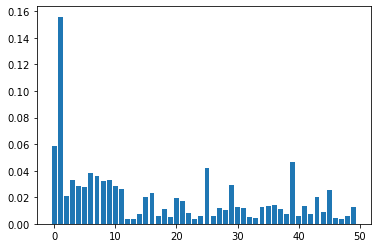

In [117]:
plt.bar(range(len(pipeline_temp['model'].feature_importances_)), pipeline_temp['model'].feature_importances_)
plt.show()

# Try Gradient Boosting

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
oh2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
gb = GradientBoostingClassifier(n_estimators=150, max_depth=30, learning_rate=0.3)
pipeline_temp2 = Pipeline(steps=[('preprocessor', oh2),('model', gb)])

In [152]:
pipeline_temp2.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False)),
                ('model',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=30, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                   

In [155]:
y_pred2 = pipeline_temp2.predict(val_X)
round((y_pred2==val_y).sum()/len(y_pred), 3)

0.326

In [128]:
import pickle
filename = './models/rfpipe_cg.pkl'
pickle.dump(pipeline_temp, open(filename, 'wb'))

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
#pipeline_1 = Pipeline(steps=[('model', RandomForestRegressor(random_state=0))])
#pipeline_2 = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=0))])
#pipeline_3 = Pipeline(steps=[('model', XGBRegressor(random_state=0))])